# 人脸跟踪流程

以下示例说明如何使用`facenet_pytorch`Python软件包使用MTCNN在图像数据集上执行人脸检测和跟踪。

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

#### 判断是否有nvidia GPU可用

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('在该设备上运行: {}'.format(device))

在该设备上运行: cpu


#### 定义MTCNN模块

需要注意的是，由于MTCNN是一组神经网络和其他代码，因此必须按以下方式传递设备以在需要时内部启用对象复制。

有关更多详细信息，请参见`help(MTCNN)`。

In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

#### 获取样本视频

我们首先加载一个包含一些人脸的视频。使用mmlabs的`mmcv`PyPI软件包读取视频帧（可以使用`pip install mmcv`安装）。然后将帧转换为PIL图像。

这段代码是使用OpenCV库将视频的每一帧转换PIL图像对象的列表。具体解释如下：

1. cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)：这是OpenCV库中的一个函数，用于将BGR格式的图像转换为RGB格式。视频的每一帧都会经过这个转换。

2. Image.fromarray(...)：这是PIL库中的一个函数，用于将NumPy数组转换为PIL图像对象。cv2.cvtColor(...)返回的是一个NumPy数组，通过Image.fromarray(...)将其转换为PIL图像对象。

3. for frame in video：这是一个循环语句，遍历视频中的每一帧。

综合起来，这段代码的作用是将视频的每一帧转换为RGB格式的PIL图像对象，并将它们存储在名为frames的列表中。



In [16]:
video = mmcv.VideoReader('video.mp4')
# display.display(video[0],display_id=True)
# print(type(video[0]))
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('video.mp4', width=640)

#### 通过MTCNN运行视频

我们迭代每个帧，检测人脸，并在视频帧上绘制它们的边界框。

In [5]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\r当前帧: {}'.format(i + 1), end='')
    
    # 检测人脸
    boxes, _ = mtcnn.detect(frame)
    
    # 绘制人脸框
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # 添加到图像列表
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\n结束')

当前帧: 105
结束


#### 显示检测结果

In [6]:
h=0

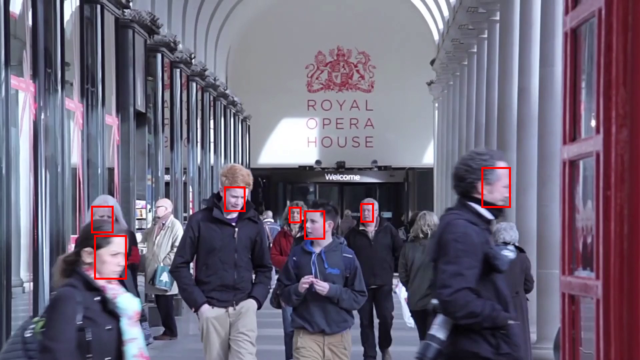

In [7]:
d = display.display(frames_tracked[h], display_id=True)
d.update(frames_tracked[h % len(frames_tracked)])
h+=1

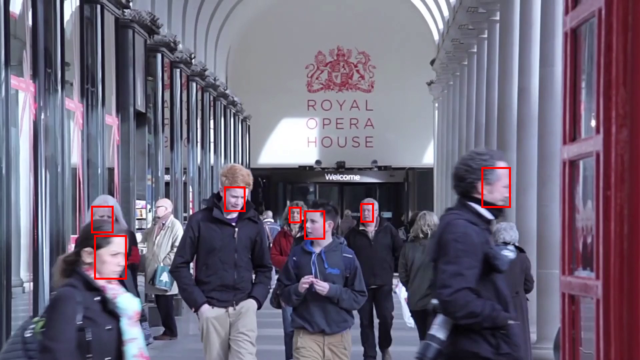

In [8]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
while i<=len(frames_tracked):
    d.update(frames_tracked[i % len(frames_tracked)])
    i += 1

#### 保存跟踪后的视频

In [14]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()
display.Video('video_tracked.mp4', width=640)